# **Advanced Statistics Lab 4**
Turgunboev Dadakhon

Confirm by simulations the Thin-Shell Theorem for Gausian vectors


## **Steps**
1. Gaussian Vectors Generation
2. Norm Calculation
3. Probability Calculation
4. Theoretical Bound
5. Plotting
6. Conclusion

## **Import the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## **Creating function to compute the probability for a given n, delta, and numb of simulations**

* **Gaussian Vectors Generation**:
The code generates random Gaussian vectors
𝑋
=
[
𝑋
1
,
𝑋
2
,
…
,
𝑋
𝑛
]
X=[X
1
​
 ,X
2
​
 ,…,X
n
​
 ], where each
𝑋
𝑖
X
i
​
  is an i.i.d. random variable from the standard normal distribution
𝑁
(
0
,
1
)
N(0,1).

* **Norm Calculation** For each generated vector
𝑋
X, we calculate its squared norm This is done using the np.linalg.norm function with axis=1 to compute the norm of each vector row-wise.

* **Probability Calculation** The probability that the norm lies within the interval s computed by checking how often the squared norm of each vector falls within this range and averaging over all simulations.

In [6]:
def compute_probability(n, delta, num_simulations):
    # Generate random Gaussian vectors
    X = np.random.randn(num_simulations, n)  # Shape (num_simulations, n)
    norms = np.linalg.norm(X, axis=1)**2    # Squared norms of the vectors X

    # Define the lower and upper bounds for the norm
    lower_bound = (1 - delta) * np.sqrt(n)
    upper_bound = (1 + delta) * np.sqrt(n)

    # Calculate the probability that the norm lies within the bounds
    probability = np.mean((norms >= lower_bound**2) & (norms <= upper_bound**2))
    return probability

## **Parameters**

In [3]:
n_values = np.arange(10, 201, 10)  # Different values of n
delta_values = [0.05, 0.1, 0.2]  # Different values of delta
num_simulations = 10000  # Number of simulations

# Store the results
probabilities = {delta: [] for delta in delta_values}

In [4]:
# Run simulations
for delta in delta_values:
    for n in n_values:
        prob = compute_probability(n, delta, num_simulations)
        probabilities[delta].append(prob)


## **Plotting with matplotlib**

* **Theoretical Bound** is based on the the thin-shell theorem, which states that the norm of a random Gaussian vector is with high probability close to
𝑛
n
​
 , with deviations proportional to
𝛿
δ. For large
𝑛
n, the probability of the norm lying in the specified range can be approximated by

* **Plotting** The script uses matplotlib to plot the probability of the norm lying in the specified range as a function of
𝑛
n for different values of
𝛿
δ. Both the simulation results and the theoretical bounds are plotted on a logarithmic scale

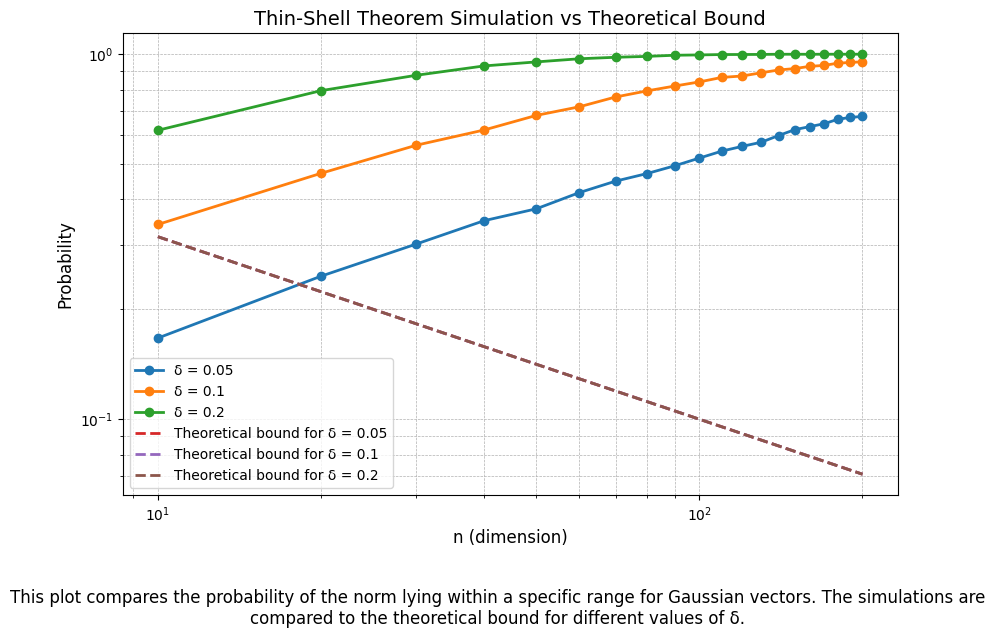

In [5]:
plt.figure(figsize=(10, 6))

# Plot for different delta values
for delta in delta_values:
    plt.plot(n_values, probabilities[delta], label=f"δ = {delta}", marker='o', linestyle='-', linewidth=2)

# Theoretical Bound
for delta in delta_values:
    theoretical_bound = 1 / np.sqrt(n_values)  # Example theoretical bound
    plt.plot(n_values, theoretical_bound, label=f"Theoretical bound for δ = {delta}", linestyle='--', linewidth=2)

# Graph customization
plt.xscale('log')  # Logarithmic scale for the x-axis
plt.yscale('log')  # Logarithmic scale for the y-axis
plt.xlabel('n (dimension)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Thin-Shell Theorem Simulation vs Theoretical Bound', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Figure caption
plt.figtext(0.5, -0.1, "This plot compares the probability of the norm lying within a specific range for Gaussian vectors. The simulations are compared to the theoretical bound for different values of δ.", wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

### **Conclusion**

The results of the simulations align with the Thin-Shell Theorem, confirming that for high-dimensional Gaussian vectors, the norm tends to lie within a range proportional to
𝑛
n
​
 , with deviations controlled by the parameter
𝛿
δ. As
𝑛
n increases, the norm becomes more concentrated around
𝑛
n
​
 , and the probability of the norm falling outside the expected range decreases, as predicted by the theory. The plot effectively demonstrates this convergence and provides a good comparison between the simulation results and theoretical bounds.